In [35]:
import os
import sys
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt

sys.path.append('../')
from VCA import vca
from preprocessing import *
from plotting_parameters import *
from pysptools.eea import NFINDR
from pysptools.eea.eea import PPI, FIPPI, ATGP

In [2]:
data_folder = "../../datasets/helicoid/012-01"

# Load the sp data
img = sp.open_image(data_folder + "/raw.hdr")   
white_ref = sp.open_image(data_folder + "/whiteReference.hdr")
dark_ref = sp.open_image(data_folder + "/darkReference.hdr")
gt_map = sp.open_image(data_folder + "/gtMap.hdr")

# calibrated image
img_calib = calibrate_img(img, white_ref, dark_ref)
img_calib_norm = img_calib/np.linalg.norm(img_calib, axis=-1, ord=1, keepdims=True)
img_calib_norm, band_centers = band_removal(img_calib_norm, [450,900], img.bands.centers)
print(img_calib_norm.shape)

# projected image
R_E = np.load(f"{data_folder}/results/R_E.npy")
R_E_norm = R_E/np.linalg.norm(R_E, axis=2, ord=1, keepdims=True)

c:\Users\User\anaconda3\envs\thesis\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


(443, 497, 618)


### VCA
https://www.cise.ufl.edu/~pgader/HyperspectralImageAnalysis/NotesAndPapers/VCA.pdf

In [26]:
Y = img_calib_norm.reshape(-1, img_calib_norm.shape[-1]).T 
Ae_vca, indice_vca, Yp_vca = vca(Y,4,verbose = True,snr_input = 0)

SNR estimated = 25.519630195886748[dB]
... Select the projective proj.


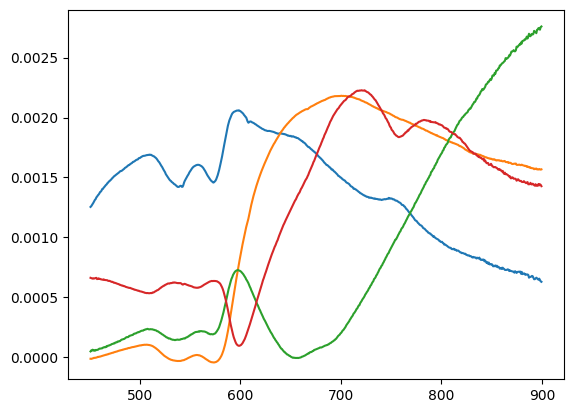

In [27]:
plt.plot(band_centers,  Ae)

### ATGP

In [45]:
Ae_atgp, indice_atgp = ATGP(data=Y.T, q=4)
Ae_atgp = Ae_atgp.T

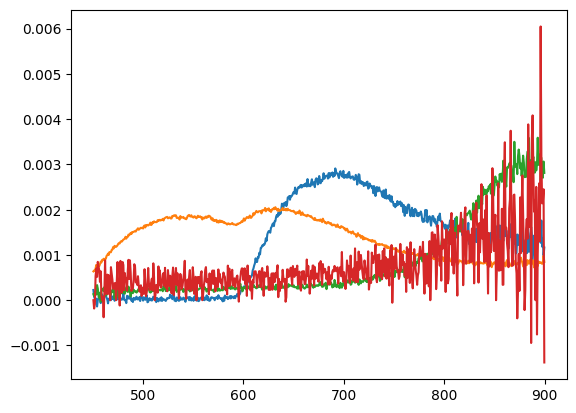

In [29]:
plt.plot(band_centers,  Ae_atgp)

### FIPPI

In [46]:
Ae_fippi, indice_fippi = FIPPI(M=Y.T, q=4)
Ae_fippi = Ae_fippi.T

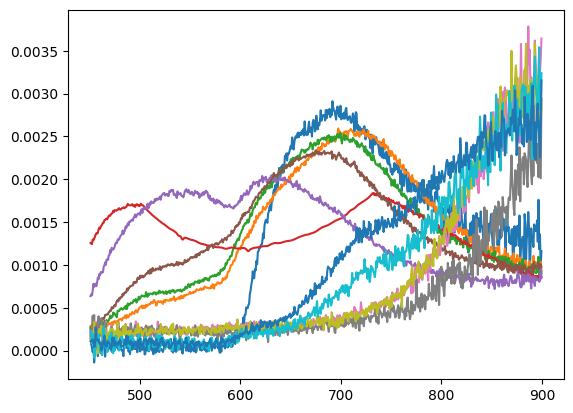

In [31]:
plt.plot(band_centers,  Ae_fippi)

### N-FINDR

In [40]:
nfindr = NFINDR()
Ae_nfindr = nfindr.extract(M=img_calib_norm, q=4)
Ae_nfindr = Ae_nfindr.T

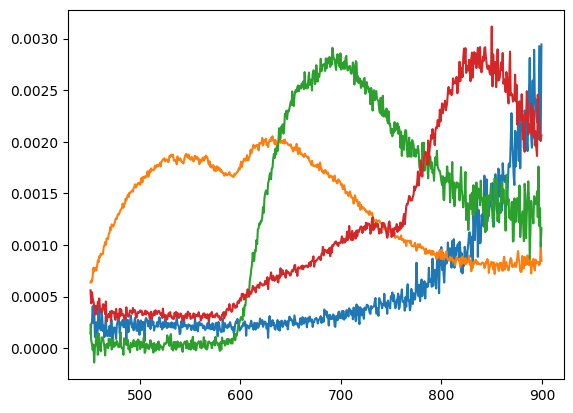

In [41]:
plt.plot(band_centers,  Ae_nfindr)

### SMACC

In [51]:
Ae_smacc, _, _ = sp.algorithms.smacc(img_calib_norm, 4)
Ae_smacc = Ae_smacc.T

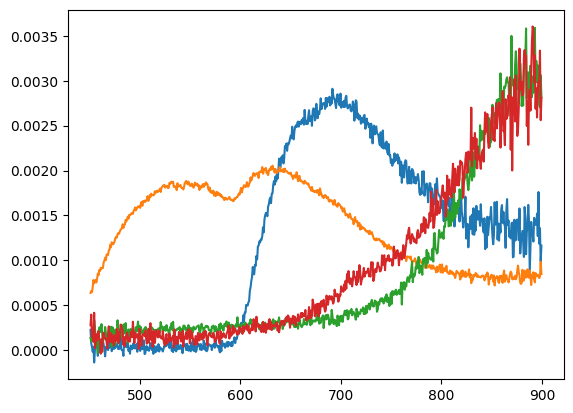

In [52]:
plt.plot(band_centers,  Ae_smacc)

## Comparision

Text(0.5, 1.0, 'SMACC')

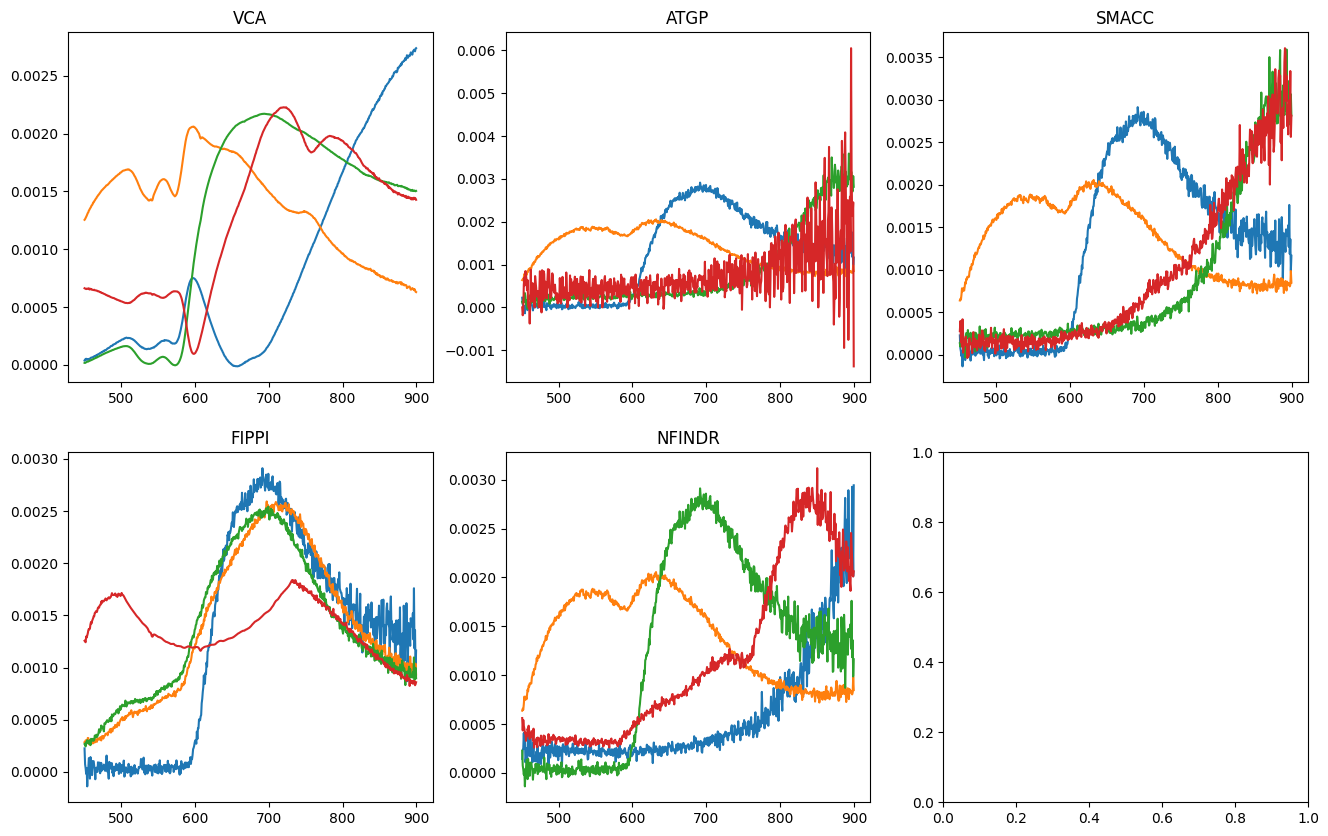

In [55]:
fig, axs = plt.subplots(2,3, figsize=(16,10))
axs[0,0].plot(band_centers,  Ae_vca)
axs[0,0].set_title("VCA")
axs[0,1].plot(band_centers,  Ae_atgp)
axs[0,1].set_title("ATGP")
axs[1,0].plot(band_centers,  Ae_fippi[:,:4])
axs[1,0].set_title("FIPPI")
axs[1,1].plot(band_centers,  Ae_nfindr)
axs[1,1].set_title("NFINDR")
axs[0,2].plot(band_centers,  Ae_smacc)
axs[0,2].set_title("SMACC")
